In [166]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt

In [167]:
df = pd.read_csv('../prepare data/data/df_ts_bs.csv', date_parser=True)
df.head()

,timestamp,teams_team_1_name,teams_team_2_name,target
0,2023-10-29 15:30:00,Manchester United,Manchester City,0.25
1,2023-10-29 14:00:00,Aston Villa,Luton Town,2.00
2,2023-10-29 14:00:00,Brighton & Hove Albion,Fulham,1.00
3,2023-10-29 14:00:00,Liverpool,Nottingham Forest,4.00
4,2023-10-29 13:00:00,West Ham United,Everton,0.50


In [168]:
team = 'Brighton & Hove Albion'
df = df[(df['teams_team_1_name']==team) | (df['teams_team_2_name']==team)]
df

,timestamp,teams_team_1_name,teams_team_2_name,target
2,2023-10-29 14:00:00,Brighton & Hove Albion,Fulham,1.000000
16,2023-10-21 15:00:00,Manchester City,Brighton & Hove Albion,1.500000
21,2023-10-08 14:00:00,Brighton & Hove Albion,Liverpool,1.000000
40,2023-09-30 12:30:00,Aston Villa,Brighton & Hove Albion,3.500000
43,2023-09-24 14:00:00,Brighton & Hove Albion,Bournemouth,2.000000
...,...,...,...,...
1950,2018-09-17 20:00:00,Southampton,Brighton & Hove Albion,1.000000
1964,2018-09-01 15:00:00,Brighton & Hove Albion,Fulham,1.000000
1974,2018-08-25 17:30:00,Liverpool,Brighton & Hove Albion,2.000000
1981,2018-08-19 16:00:00,Brighton & Hove Albion,Manchester United,1.333333


In [169]:
df['target'] = np.where(df['teams_team_2_name']==team, 1 / df['target'], df['target']) #Меняем таргет в зависимости от того тим1 или тим2
df.sort_values(by='timestamp', inplace=True)
df

,timestamp,teams_team_1_name,teams_team_2_name,target
1997,2018-08-11 15:00:00,Watford,Brighton & Hove Albion,0.333333
1981,2018-08-19 16:00:00,Brighton & Hove Albion,Manchester United,1.333333
1974,2018-08-25 17:30:00,Liverpool,Brighton & Hove Albion,0.500000
1964,2018-09-01 15:00:00,Brighton & Hove Albion,Fulham,1.000000
1950,2018-09-17 20:00:00,Southampton,Brighton & Hove Albion,1.000000
...,...,...,...,...
43,2023-09-24 14:00:00,Brighton & Hove Albion,Bournemouth,2.000000
40,2023-09-30 12:30:00,Aston Villa,Brighton & Hove Albion,0.285714
21,2023-10-08 14:00:00,Brighton & Hove Albion,Liverpool,1.000000
16,2023-10-21 15:00:00,Manchester City,Brighton & Hove Albion,0.666667


/tmp/ipykernel_83004/1214434814.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['teams_team_1_name', 'teams_team_2_name', 'timestamp'], dtype='object')
  plt.plot(df['timestamp'][190:], df['target'][190:], '-', df['timestamp'][190:], df.rolling(5).mean()[190:], '--') #Скользящая средняя


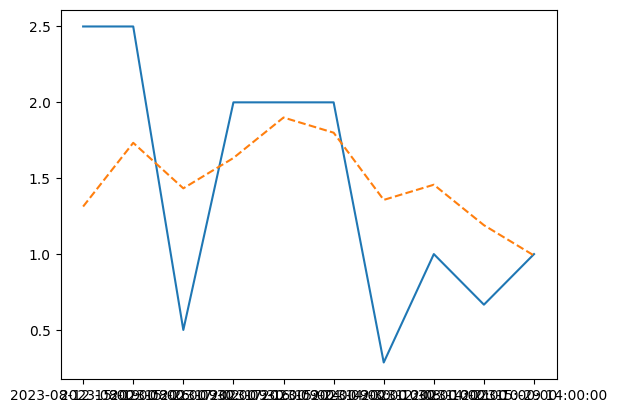

In [175]:
plt.plot(df['timestamp'][190:], df['target'][190:], '-', df['timestamp'][190:], df.rolling(5).mean()[190:], '--') #Скользящая средняя

In [171]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [172]:
pred = exponential_smoothing(df['target'], 0.1)

KeyError: 0